# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cast = pd.read_csv("data/cast.csv")
dates = pd.read_csv("data/release_dates.csv")
titles = pd.read_csv("data/titles.csv")

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

Cast has 3,442,902 total records, but some columns are missing some information, which is why they show different amounts when I count how many records are in each row. The release dates data set has 443,486 records while the titles data set has 226,013 records.  Both of these datasets have some variance in total number of records in each column, but not as much as the cast dataset. In Cast Title, Name, Type and Character are all objects, while n is a float and year is a integer.  In the release dates data set year is an integer while title, country and date are all objects.  For the title dataset title is an object and year is an integer.  It's interesting that in the release date dataset year is an integer while date is an object.  

In [4]:
print("Cast")
cast.info()
print("Release Dates")
dates.info()
print("Titles")
titles.info()

Cast
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
Release Dates
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
Titles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  obj

In [5]:
cast.count()



title        3442896
year         3442902
name         3442902
type         3442902
character    3442894
n            2115119
dtype: int64

In [6]:
dates.count()

title      443485
year       443486
country    443486
date       443486
dtype: int64

In [7]:
titles.count()

title    226012
year     226013
dtype: int64

### 2. How many movies have the title North by Northwest

In [10]:
titles[titles['title'] == 'North by Northwest']

,title,year
201761,North by Northwest,1959


There is one movie that has the exact title of North by Northwest. I also wanted to see if there were other movies that contained North by Northwest, but might have something before or after IE: The North by Northwest 2, but there weren't any.  

In [12]:
titles[titles.title.str.contains('North by Northwest', na = False)]


,title,year
201761,North by Northwest,1959


### 3. How many version of Hamlet are there, when was the first made? the last?

There are 55 versions of Hamlet in the titles dataset, with the first being made in 1910 and the last being made in 2018.

In [15]:
titles[titles.title.str.contains('Hamlet', na = False)].count()

title    55
year     55
dtype: int64

In [16]:
titles[titles.title.str.contains('Hamlet', na = False)].min()

title    A Sagebrush Hamlet
year                   1910
dtype: object

In [17]:
titles[titles.title.str.contains('Hamlet', na = False)].max()

title    Zombie Hamlet
year              2018
dtype: object

In [18]:
titles[titles.title.str.contains('Hamlet', na = False)].sort_values(by='year')

,title,year
79939,Hamlet,1910
129673,Hamlet,1911
164637,Hamlet,1913
150955,A Sagebrush Hamlet,1919
221419,Hamlet,1921
54760,"Han, hun og Hamlet",1922
161129,"Han, hun og Hamlet",1932
221201,Hamlet,1948
220568,Hamlet,1954
132525,Hamlet (II),1964


### 4. List all the movies called Treasure Island from oldest to newest

All of the movies called "Treasure Island" with the oldest being made in 1918 and the most recent being made in 2015

In [21]:
titles[titles.title.str.contains('Treasure Island', na = False)].sort_values(by='year')

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
5854,The Secret of Treasure Island,1938
126321,Treasure Island,1950
8382,Return to Treasure Island,1954
26147,Five on a Treasure Island,1957
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In 1950 there were 1,109 movies made, in 1980 1,750 movies were made, and in 2000 2,568 movies made.  Between the 1950's and 2000's the amount of movies has doubled.  I think this can be attributed to an increase in disposable income and technology.  Disposable income will increase the demand for entertainment like movies, thus more movies were made.  The increase in technology could make movies easier / less expensive to make as well as allowed them to continue to generate revenue once out of the box office.  In the decades we're looking at it would most likely be VHS and DVD's, but in later years it would be streaming services and on demand rentals.  Movies and cinema are an artform, but they are also a business.  By having an increase in demand new movies were made to keep up with the appetite for entertainment.  

In [24]:
titles[(titles.year ==1950)]["title"].count

<bound method Series.count of 47                         Vendetta
62            The Invisible Monster
171           El pecado de quererte
432                Battling Marshal
507       Fortunes of Captain Blood
                    ...            
224785                     Doctor X
224865                     Rupkatha
224879               Xin cha hua nu
225382           The Kid from Texas
225908             Beauty on Parade
Name: title, Length: 1109, dtype: object>

In [25]:
titles[(titles.year ==1980)]["title"].count

<bound method Series.count of 20                     Fico d'India
21                  Insaf Ka Tarazu
72                     Xiang ye ren
144                     Alibha Daga
249          Ang leon at ang kuting
                    ...            
225661    A Woman of Good Character
225771                 Pile ou face
225856        Fantozzi contro tutti
225901             Nan bei tui wang
225985              Prema Tarangalu
Name: title, Length: 1750, dtype: object>

In [26]:
titles[(titles.year ==2000)]["title"].count

<bound method Series.count of 5               Ostatnia misja
33               Cesta z mesta
66            2000 + 1 stigmes
116         It Was an Accident
439       Motevalede mahe mehr
                  ...         
225743      Le sourire d'Alice
225853        La jiao jiao shi
225870          Vamsodharakudu
225926            Foll Al-Foll
225932             My Dog Skip
Name: title, Length: 2568, dtype: object>

### 6. How big was the cast of Metropolis


The cast for the 1927's "Metropolis" consisted of 33 cast memebers, but the majority of them didn't have a bill number with only 9 out of the 33 having a bill number. 

In [29]:
print(cast[cast['title'] == "Metropolis"].count())
cast[cast['title'] == "Metropolis"]

title        33
year         33
name         33
type         33
character    33
n             9
dtype: int64


,title,year,name,type,character,n
3416,Metropolis,1927,Alfred Abel,actor,Joh Fredersen,1.0
26389,Metropolis,1927,Fritz Alberti,actor,Creative Human - Man who Convinces Babel,NaN
193089,Metropolis,1927,Erwin Biswanger,actor,11811 - Georgy,6.0
542995,Metropolis,1927,Max Dietze,actor,Working Man,NaN
709318,Metropolis,1927,Gustav Fröhlich,actor,Freder - Joh Fredersen's Son,2.0
747304,Metropolis,1927,Heinrich George,actor,Grot - the Guardian of the Heart Machine,7.0
789295,Metropolis,1927,Heinrich Gotho,actor,Master of Ceremonies,NaN
1015520,Metropolis,1927,Georg John,actor,Working Man Who Causes Explosion of M-Machine,NaN
1110313,Metropolis,1927,Rudolf Klein-Rogge,actor,C.A. Rotwang - the Inventor,3.0
1141892,Metropolis,1927,Walter Kuehle,actor,Working Man,NaN


### 7. How many roles for actors were there 1950's? 1990's

In the 1950's there were 90,603 roles for actors and in the 1990's there were 134,449 roles.  In the 1950's the most popular character was a townsman, while in the 1990's it was people making cameos playing themself.

In [32]:
print(cast[(cast.year >= 1950)&(cast.year<=1959)&(cast.type == "actor")]["character"].value_counts().head())
cast[(cast.year >= 1950)&(cast.year<=1959)&(cast.type == "actor")]["character"].value_counts()

character
Townsman      1869
Minor Role    1292
Extra          896
Barfly         703
Reporter       702
Name: count, dtype: int64


character
Townsman             1869
Minor Role           1292
Extra                 896
Barfly                703
Reporter              702
                     ... 
Walker's Deputy         1
Police Desk Clerk       1
Scud                    1
Tommy Alexander         1
Kara Efe                1
Name: count, Length: 90603, dtype: int64

In [33]:
print(cast[(cast.year >= 1990)&(cast.year<=1999)&(cast.type == "actor")]["character"].value_counts().head())
cast[(cast.year >= 1990)&(cast.year<=1999)&(cast.type == "actor")]["character"].value_counts()

character
Himself      1848
Policeman     920
Doctor        649
Bartender     606
Reporter      528
Name: count, dtype: int64


character
Himself                       1848
Policeman                      920
Doctor                         649
Bartender                      606
Reporter                       528
                              ... 
Kaniya                           1
Natwar Shah                      1
Gulshan (cameo)                  1
Chhote Thakur Madhav Singh       1
Jónas                            1
Name: count, Length: 134449, dtype: int64

### 8. How many roles for actors & actresses over time? Output should be a line graph

The number of male actors in movies has always been greater than the number of women.  In the early 2000's it was getting very close to being equal, but then there was a big spike in actors compared to actresses. 

In [179]:
cast["year"].sort_values(ascending = False).value_counts() # using 2017 as the cutoff year as that is the last full data year

year
2017    136658
2016    136271
2015    131337
2014    129053
2013    122744
         ...  
1909         3
1894         3
2023         2
1900         2
1905         1
Name: count, Length: 124, dtype: int64

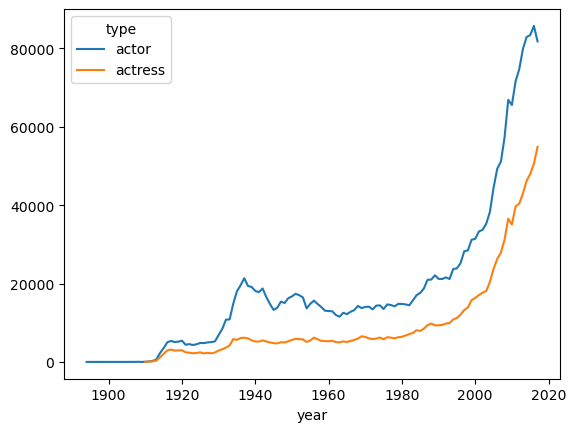

In [181]:

cast[cast["year"]<=2017].groupby(["year", "type"]).size().unstack().plot();


### 9. How many "leading roles" were there in the 2000's?

In the 2000's there were 23,593 leading roles in movies. 

In [39]:
print(cast[(cast.n == 1)&(cast.year>=2000)&(cast.year<=2009)].count())


title        23593
year         23593
name         23593
type         23593
character    23593
n            23593
dtype: int64


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In 1950 there were 95,406 roles that received no rank and in 2000 there were 232,037.  During this same time we know that movie production doubled from a previous query that we did.  We'd expect to see a doubling of roles with no rank, however we see roles with no rank more than double.  I think this would indicate higher cast counts for movies made in the 2000's compared to the 1950's. 

In [42]:
print(cast[(cast.n.isnull())&(cast.year>=2000)&(cast.year<=2009)].count())
print(cast[(cast.n.isnull())&(cast.year>=1950)&(cast.year<=1959)].count())

title        232037
year         232037
name         232037
type         232037
character    232036
n                 0
dtype: int64
title        95406
year         95406
name         95406
type         95406
character    95406
n                0
dtype: int64


### 11. Plot the number of films made in each decade

First, I had to sort them by decade, and then I wanted to check to make sure that it was added to the dataframe as expected.  Then I graphed the data.  There's been a steep incline in movies released in the past few years.

In [187]:
titles["year"].sort_values(ascending = False).value_counts() #using 2010's as the cutoff decade even though we don't have full data

year
2017    9888
2016    8198
2015    7564
2014    7159
2013    6896
        ... 
2115       1
1903       1
2026       1
2025       1
1894       1
Name: count, Length: 128, dtype: int64

In [191]:
titles["decades"]= (titles["year"] // 10) * 10
titles.head()



,title,year,decades
0,Ankara ekspresi,1952,1950
1,"Ans Vaterland, ans teure",1915,1910
2,Miss Mohini,2002,2000
3,La vera madre,1999,1990
4,O Amerikanos,1993,1990


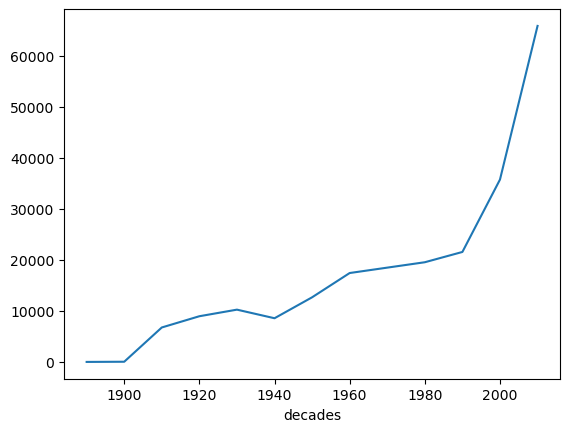

In [199]:
titles[titles["decades"] <2020].groupby("decades").size().plot();

### 12. Plot the number of films with a Rustler character over time

The Rustler character peaked in the 1930's and 1940's

In [49]:
rustler = cast[cast["character"] == "Rustler"]

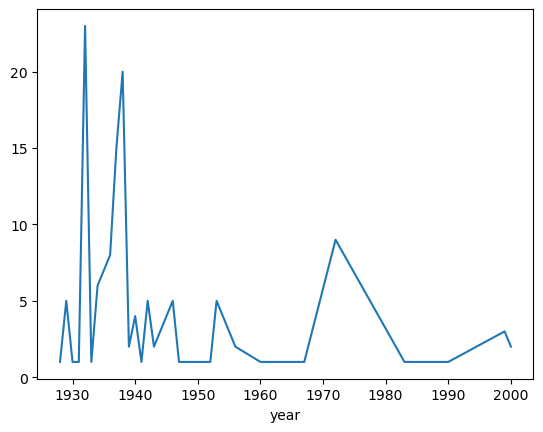

In [50]:
rustler.groupby("year").size().plot();

### 13. What are the top ten character names of all time?

Interesting that Himself and Herself makes an appearance in the top 10. Maybe this suggests that cameos have always been popular in films. 

In [53]:
cast["character"].value_counts().head(10)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In the 90's the actor with the most appearance was Shakti Kapoor with 143.  I had to look them up because I'd never heard of them, but it appears that they are a big Bollywood film star.  Interestingly, the top 5 actors in the 90's are all movie stars from India.  

In [56]:
print(cast[(cast.year >= 1990)&(cast.year<=1999)&(cast.type == "actor")]["name"].value_counts().head())

name
Shakti Kapoor     143
Kader Khan        122
Gulshan Grover    120
Anupam Kher       116
Brahmanandam      114
Name: count, dtype: int64


### 15. What are the top 10 roles that start with Science?

Science Teacher is by far the highest at 57.  I also notice that this is caps sensitive as Science Teacher and Science teacher have a unique count.  

In [59]:
cast[cast.character.str.contains("^Science", na = False)].groupby("character").size().sort_values(ascending = False).head(10)

character
Science Teacher         57
Science Fair Student     9
Science Fair Judge       6
Science Student          6
Science Kid              5
Science Reporter         5
Science Fair Kid         5
Science                  4
Science teacher          3
Science Officer          3
dtype: int64

### 16. What film has the largest cast

"Around the World in 80 Days" had a cast of 1364 members. 

In [62]:
cast.groupby("title")["name"].size().sort_values(ascending = False).head()

title
Around the World in 80 Days    1364
Hello Au Revoir                 726
7 cajas                         689
Thelma                          593
The Ten Commandments            536
Name: name, dtype: int64

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [64]:
cast.groupby("title")["name"].size().sort_values(ascending = False).info()

<class 'pandas.core.series.Series'>
Index: 168254 entries, Around the World in 80 Days to Eskandalosa
Series name: name
Non-Null Count   Dtype
--------------   -----
168254 non-null  int64
dtypes: int64(1)
memory usage: 2.6+ MB


In [65]:
castcount = pd.pivot_table(cast, values = "name", index="title", aggfunc=['count','min','max']).dropna()
castcount.sort_values( by = ("count","name"), ascending = False).head()

,count,min,max
,name,name,name
title,,,
Around the World in 80 Days,1364,'King Kong' Kashey,Zelinda Mora
Hello Au Revoir,726,Aaron (II) Hand,Yuliya Edgley
7 cajas,689,Adriana Escobar Cáceres,Ángel Coronel
Thelma,593,Aachea Malicdem,Zyra Jay Macugay
The Ten Commandments,536,Abbas El Boughdadly,Zev Bufman


### 18. How many films has Natalie Portman been in in each year throughout her career?

Natalie Portman peaked at 4 movies in a year, which she did 3 times in years 2015, 2010 and 2005.  

In [68]:
cast[(cast.name == "Natalie Portman")]["year"].value_counts().sort_index(ascending = False)

year
2017    1
2016    3
2015    4
2013    1
2011    3
2010    4
2009    2
2008    1
2007    3
2006    2
2005    4
2004    2
2003    1
2002    1
2001    1
2000    1
1999    3
1996    3
1995    1
Name: count, dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?


Interestingly, Natalie Portman appeared in as many as 3 movies where she was the top star or co-star in a year.  One interesting piece is that in 2015, 2010 and 2005 she either appeared in 3 or 2 movies as top star or co-star, which coincided with her most movie appearances. 

In [71]:
cast[(cast.name == "Natalie Portman")&(cast.n <=2)&(cast.n.notnull())]["year"].value_counts().sort_index(ascending = False)

year
2016    2
2015    2
2013    1
2011    2
2010    2
2009    1
2008    1
2007    1
2006    2
2005    3
2002    1
2000    1
1999    1
Name: count, dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

There was a very similar trend to what we saw in a previous graph, but since this uses decades it's smoothed out a bit.  

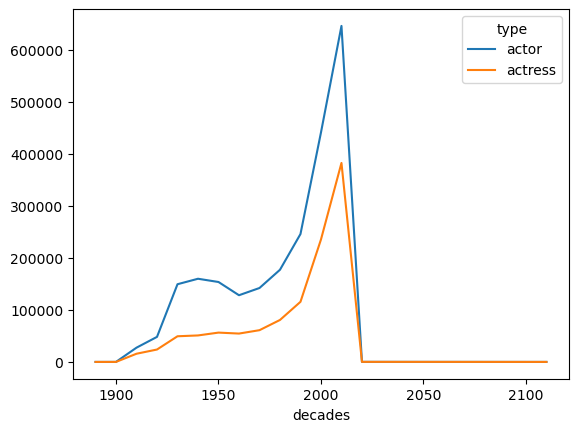

In [74]:
cast["decades"] = (cast["year"] // 10) * 10
cast.groupby(["decades", "type"]).size().unstack().plot();

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

Movies are released at higher levels on a Thursday or Friday. This makes sense as most people go to the movie theatre as a night time activity.  Interestingly, movies are realeased consistantly throughout the year.  There is some seasonality where movie releases slow down in the summer months.  It seems like the movie industry has done a good job identifying and marketing movies that make sense during that specific part of the calendar year.  They release summer blockbuster movies, scary movies during Halloween, and movies over the festive period.  It's going to be interesting to see if this starts to change as more movies go directly to streaming and with strearming services it's more about acquiring and keeping existing customers to raise net retention revenue(NRR).  On the streaming services I have it seems like there's always 1 higher production movie exclusive to the streaming service a month.  

In [76]:
dates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [77]:
dates["date"] = pd.to_datetime(dates["date"])
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    443485 non-null  object        
 1   year     443486 non-null  int64         
 2   country  443486 non-null  object        
 3   date     443486 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 13.5+ MB


In [78]:
dates["DayOfWeek"] = dates["date"].dt.day_name()
dates["Months"] = dates["date"].dt.month
dates.head()

,title,year,country,date,DayOfWeek,Months
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Friday,6
1,#BKKY,2016,Cambodia,2017-10-12,Thursday,10
2,#Beings,2015,Romania,2015-01-29,Thursday,1
3,#Captured,2017,USA,2017-09-05,Tuesday,9
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21,Wednesday,1


In [79]:
print(pd.pivot_table(dates, values = "date", index=["DayOfWeek"], aggfunc=["count"]).dropna())

            count
             date
DayOfWeek        
Friday     163174
Monday      37210
Saturday    31332
Sunday      15823
Thursday   125746
Tuesday     16762
Wednesday   53439


In [80]:
print(pd.pivot_table(dates, values = "date", index=["Months"], aggfunc=["count"]).dropna().sort_index(ascending = False))

        count
         date
Months       
12      39096
11      38201
10      40204
9       37750
8       35011
7       31421
6       32704
5       35449
4       37674
3       40257
2       36307
1       39412


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

<Axes: xlabel='Months'>

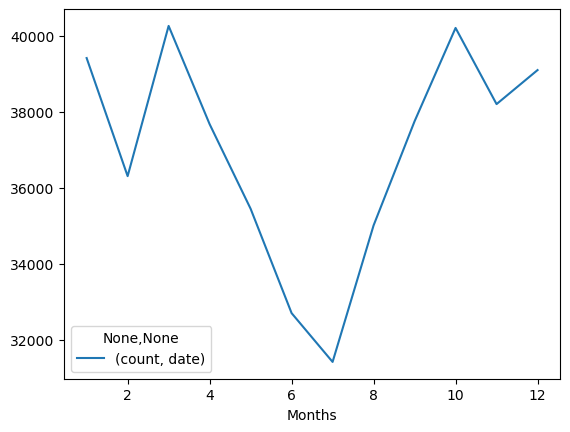

In [83]:
pd.pivot_table(dates, values = "date", index=["Months"], aggfunc=["count"]).plot()

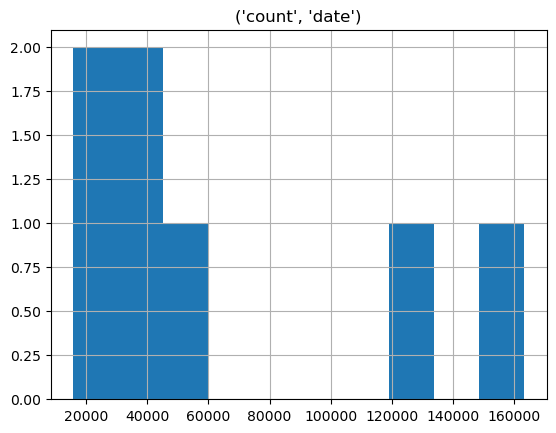

In [84]:
pd.pivot_table(dates, values = "date", index=["DayOfWeek"], aggfunc=["count"]).hist();

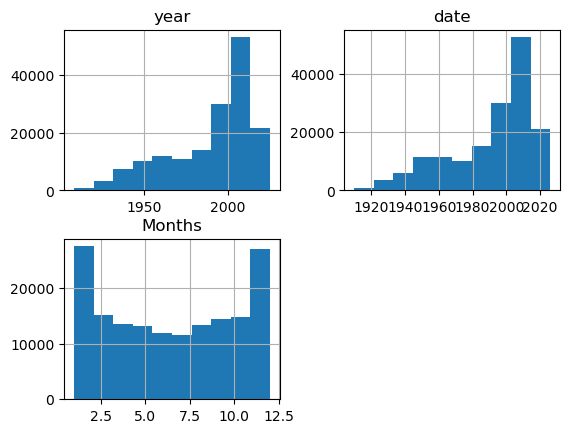

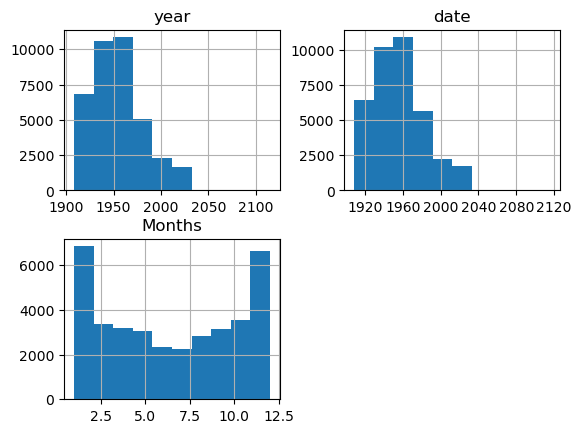

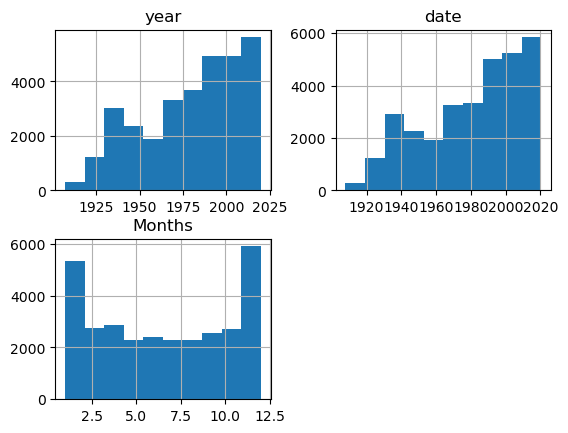

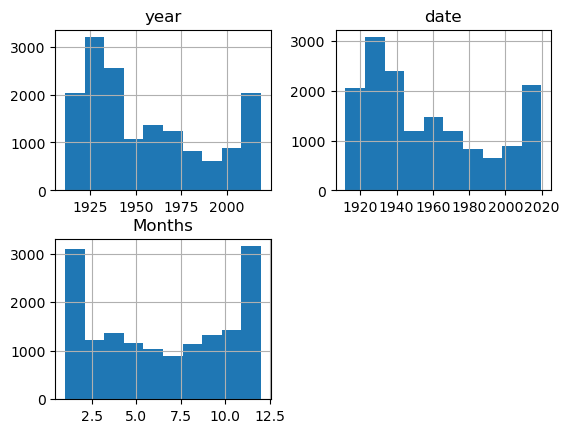

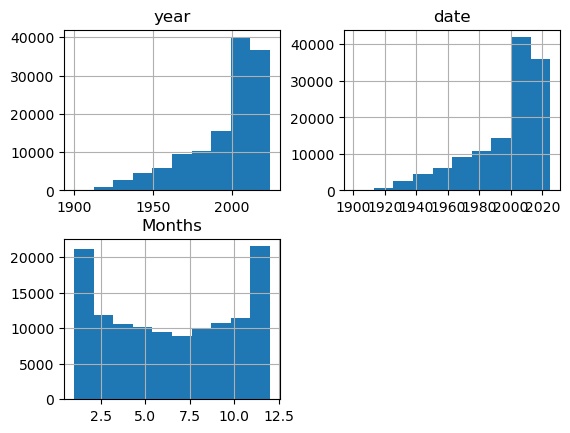

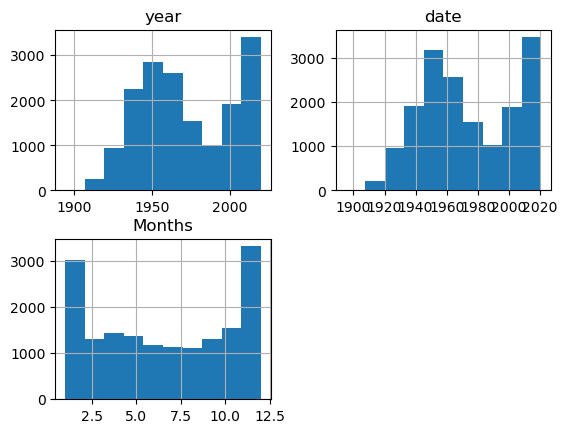

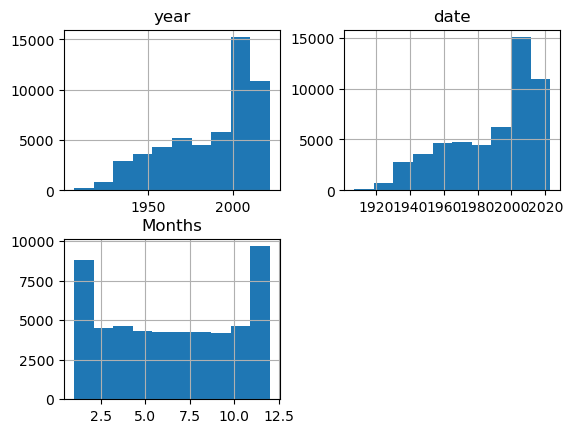

In [85]:
dates.groupby(["DayOfWeek"]).hist();

### 23. What films did actors in Star Wars go on to appear in? 

Listed below are the movies that actors appeared in that also appeared in Star Wars.  I was hoping that (cast["year"] > cast["title"].str.contains("Star Wars", na=False)) would create a logic that would reason to show movies that only happened after appearing in Star Wars, but it doesn't seem to be filtering correctly.  What is returned is all other films an actor was in who also made an appearance in Star Wars.

In [159]:
cast_of_star_wars = cast[cast["title"].str.contains("Star Wars", na=False)]["name"]
star_wars_actors = cast[(cast["name"].isin(cast_of_star_wars)) & (cast.type == "actor") & (cast["year"] > cast["title"].str.contains("Star Wars", na=False)) & (~cast["title"].str.contains("Star Wars",na = False))]
print(star_wars_actors[["title", "name", "year"]])

                             title              name  year
3900          Addams Family Values   Ian Abercrombie  1993
3901           Blasphemy the Movie   Ian Abercrombie  2001
3902              Chromiumblue.com   Ian Abercrombie  2003
3903                   Clean Slate   Ian Abercrombie  1994
3904                    Firewalker   Ian Abercrombie  1986
...                            ...               ...   ...
2286212     Middleton's Changeling  Miltos Yerolemou  1998
2286214            The Danish Girl  Miltos Yerolemou  2015
2286215     The Inbetweeners Movie  Miltos Yerolemou  2011
2286216  The West Wittering Affair  Miltos Yerolemou  2006
2286217                Tulip Fever  Miltos Yerolemou  2017

[5564 rows x 3 columns]
